GCN from Scratch Tutorial

In [1]:
%pip install community

  Created wheel for community: filename=community-1.0.0b1-py3-none-any.whl size=2154 sha256=5f3de30cf0909f861328985b812023204da2749a08d77f90145631e41c94b2cd
  Stored in directory: c:\users\amade\appdata\local\pip\cache\wheels\e5\32\7b\aebaa96975f39189b78d7b123cf90e5fd2f0418953833b3043
Successfully built community
Note: you may need to restart the kernel to use updated packages.


In [17]:
import warnings; warnings.filterwarnings('ignore')
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation 
from IPython.display import HTML 
from sklearn.preprocessing import OneHotEncoder
import community
import tensorflow.compat.v1 as tf

### Import zacharys karate club

In [3]:
G = nx.karate_club_graph()
print(f'G has {G.number_of_nodes()} nodes and {G.number_of_edges()} edges')

G has 34 nodes and 78 edges


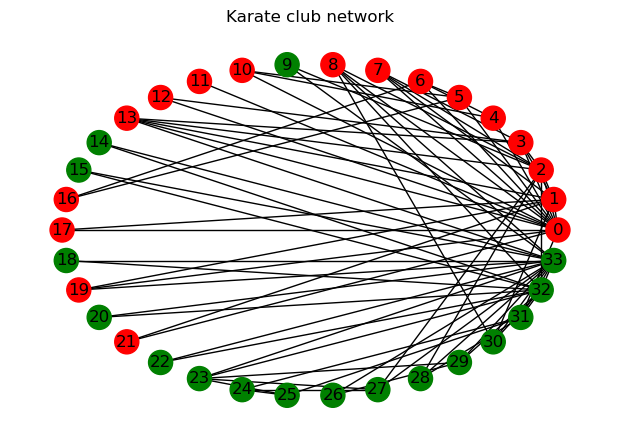

In [4]:
plt.figure(dpi = 100)
pos = nx.circular_layout(G)
node_color = ['r' if G.nodes[v]['club'] == 'Mr. Hi' else 'g' for v in G]
nx.draw(G, pos=pos, with_labels=True, node_color=node_color)
plt.title('Karate club network')
plt.show()

### Convolutional Layer and info passage with adjacency matrix

In [10]:
order =sorted(list(G.nodes()))

# Adjacency matrix
A = nx.to_numpy_matrix(G, nodelist= order)

# Identity matrix
I = np.eye(*A.shape)

#add a self loop to each node
A_tilde = A.copy() + I

#create diagonal matrix
D_tilde = np.array(np.sum(A_tilde, axis = 0))[0]

#Apply symmetric normalization
D_inv = np.matrix(np.diag(D_tilde**-0.5))
A_hat = D_inv*A_tilde*D_inv


X= I



In [33]:
import torch
import networkx as nx
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from torch.utils.data import TensorDataset, DataLoader

def get_ds():
    '''
    get data
    '''
    G = nx.karate_club_graph()
    N = G.number_of_nodes()
    X = torch.eye(N, N)
    
    node_labels = [1 if G.nodes[v]['club'] == 'Mr. Hi' else 0 for v in G]
    y_train = np.array(node_labels)
    Y_train = OneHotEncoder(categories='auto').fit_transform(y_train.reshape(-1, 1))
    Y_train = Y_train.toarray()
    Y = torch.tensor(Y_train)

    # Concatenate X and Y along the second axis
    concatenated_data = torch.cat((X, Y), dim=1)

    # Convert to a PyTorch TensorDataset
    dataset = TensorDataset(concatenated_data)

    # Create DataLoader
    data_loader = DataLoader(dataset, shuffle=True)

    return G, data_loader

# Example usage:
graph, data_loader = get_ds()

# Iterate through the DataLoader
for batch in data_loader:
    concatenated_data_batch = batch[0]  # Assuming there is only one element in the batch
    print(concatenated_data_batch)


tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0.]],
       dtype=torch.float64)
tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]],
       dtype=torch.float64)
tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]],
       dtype=torch.float64)
tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]],
       dtype=torch.float64)
tensor([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]],
       dtype=torch.float64)
tensor([[0., 0., 0., 0., 0., 0., 0., 0.,

In [38]:
float_tensor = torch.FloatTensor([1.0, 2.0, 3.0])
double_tensor = torch.tensor([1.0, 2.0, 3.0], dtype = torch.double)

In [39]:
double_tensor

tensor([1., 2., 3.], dtype=torch.float64)

In [34]:
import torch

mask_tr = torch.BoolTensor([0] * 34)
mask_tr[[0, 33]] = 1

print("PyTorch Mask Tensor:")
print(mask_tr)


PyTorch Mask Tensor:
tensor([ True, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False,  True])


In [25]:
import torch
w = torch.eye(*A.shape)

In [27]:
torch.tensor(torch.sum(w, dim = 0)) + w[0]

tensor([2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [29]:
D_inv = torch.tensor(torch.diag(torch.tensor(D_tilde)**-0.5))

In [23]:
D_tilde = np.array(np.sum(A_tilde, axis = 0))[0]
D_tilde

array([43., 30., 34., 19.,  9., 15., 14., 14., 18.,  4.,  9.,  4.,  5.,
       18.,  6.,  8.,  7.,  4.,  4.,  6.,  5.,  5.,  6., 22.,  8., 15.,
        7., 14.,  7., 14., 12., 22., 39., 49.])

In [11]:
# Weights initialization
n_input = 34    # Input layer dimension
n_hidden = 4    # Hidden layer dimension
n_embedding = 2 # Node embedding dimension

np.random.seed(123)

# Input to hidden weights
W_1 = np.random.normal(loc=0, scale=1, size=(n_input, n_hidden)) 

# Hidden to output weights
W_2 = np.random.normal(loc=0, size=(n_hidden, n_embedding))

In [12]:
# Define a GCN layer, include the ReLU Activation function
def relu(x):
    return np.maximum(x, 0, x)
    
def gcn_layer(A_hat, X, W):
    return relu(A_hat * X * W)

In [13]:
# Stack the GCN layers
H_1 = gcn_layer(A_hat, X, W_1)
H_2 = gcn_layer(A_hat, H_1, W_2)
output = H_2

print('Output shape:', output.shape)

Output shape: (34, 2)


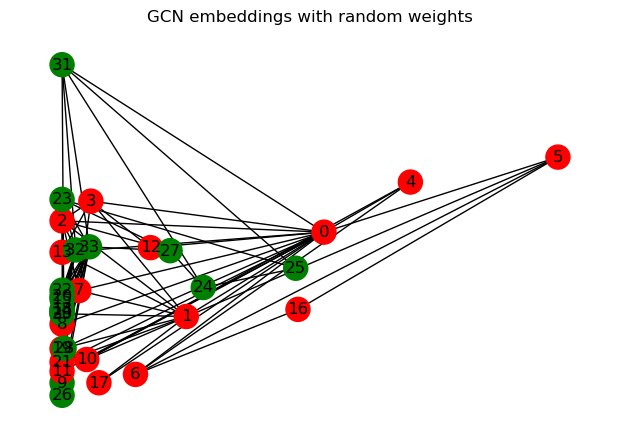

In [14]:
plt.figure(dpi=100)
# Extract the feature representations
feature_representations = {node: np.array(output)[node] for node in G.nodes()}
# Plot the embeddings
nx.draw(G, pos= feature_representations, with_labels=True, node_color=node_color)
plt.title('GCN embeddings with random weights')
plt.show()

In [15]:
# These two functions borrowed from [2] 

def masked_softmax_cross_entropy(preds, labels, mask):
    """Softmax cross-entropy loss with masking."""
    loss = tf.nn.softmax_cross_entropy_with_logits_v2(logits=preds, labels=labels)
    mask = tf.cast(mask, dtype=tf.float32)
    mask /= tf.reduce_mean(mask)
    loss *= mask
    return tf.reduce_mean(loss)

def masked_accuracy(preds, labels, mask):
    """Accuracy with masking."""
    correct_prediction = tf.equal(tf.argmax(preds, 1), tf.argmax(labels, 1))
    accuracy_all = tf.cast(correct_prediction, tf.float32)
    mask = tf.cast(mask, dtype=tf.float32)
    mask /= tf.reduce_mean(mask)
    accuracy_all *= mask
    return tf.reduce_mean(accuracy_all)

In [18]:
A_Hat = tf.constant(A_hat, 'float')
# ---------------------------------------------------------------- 
X_train = I

node_labels = [1 if G.nodes[v]['club'] == 'Mr. Hi' else 0 for v in G]
y_train = np.array(node_labels)
Y_train = OneHotEncoder(categories='auto').fit_transform(y_train.reshape(-1, 1))
Y_train = Y_train.toarray()

X = tf.placeholder('float', [X_train.shape[0], X_train.shape[1]],name = 'X')  
Y = tf.placeholder('float', [Y_train.shape[0], Y_train.shape[1]],name = 'Y') 
mask = tf.placeholder('float', [X_train.shape[0]],name = 'Mask') 
# ---------------------------------------------------------------- 
# Trainable parameters
n_input = 34
n_hidden = 4
n_classes = 2

params = {
    # Input to hidden weights
    'W_1': tf.Variable(tf.random_normal([n_input, n_hidden], mean= 0, stddev= 1), name = 'W_1'),
    # Hidden to output weights
    'W_2': tf.Variable(tf.random_normal([n_hidden, n_classes], mean= 0, stddev= 1), name = 'W_2')
}
# ---------------------------------------------------------------- 
def GCN_supervised(X, params):
    layer_1 = tf.matmul(tf.matmul(A_Hat, X), params['W_1'])
    layer_1 = tf.nn.relu(layer_1, name = 'layer_1')  
    output = tf.matmul(tf.matmul(A_Hat, layer_1), params['W_2'], name = 'output_layer') 
    return output

Z = GCN_supervised(X, params)
Y_prob = tf.nn.softmax(Z, name = 'Y_prob')

mask_tr = np.zeros(34)
mask_tr[[0, 33]] = 1
mask_tr = np.array(mask_tr, dtype=np.bool)

fro = tf.matmul(Z, tf.transpose(Z)) - A_Hat
reg = tf.sqrt(tf.reduce_sum(tf.square(fro)))

lambdaa = 0.1
cost = masked_softmax_cross_entropy(preds = Y_prob, labels = Y, mask = mask_tr) + lambdaa * reg
# ---------------------------------------------------------------- 
num_epochs = 1000
learning_rate = 0.1
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost) 

accuracy = masked_accuracy(preds = tf.round(Y_prob), labels = Y, mask = mask_tr)
# ----------------------------------------------------------------
# Global variables initializer 
init = tf.global_variables_initializer() 
# Starting the Tensorflow Session 
with tf.Session() as sess:       
    # Initializing the variables 
    init.run()  

    cost_history = []
    accuracy_history = [] 
    embeddings = []
    for epoch in range(num_epochs):    
        # Running the optimizer 
        sess.run(optimizer, feed_dict={X: X_train, Y: Y_train, mask: mask_tr}) 
                 
        # Calculating & storing cost, accuracy and embeddings on current epoch 
        c, acc, z = sess.run([cost, accuracy, Z], feed_dict = {X: X_train, Y: Y_train, mask: mask_tr}) 
        cost_history.append(c) 
        accuracy_history.append(acc)
        embeddings.append(z)
# ----------------------------------------------------------------
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
plt.plot(np.arange(1, len(cost_history)+1), cost_history) 
plt.xlabel('Training iterations')
plt.ylabel('Cost')

plt.subplot(1,2,2)
plt.plot(np.arange(1, len(accuracy_history)+1), accuracy_history) 
plt.xlabel('Training iterations')
plt.ylabel('Accuracy');

RuntimeError: tf.placeholder() is not compatible with eager execution.